Basic datasets provided to us.

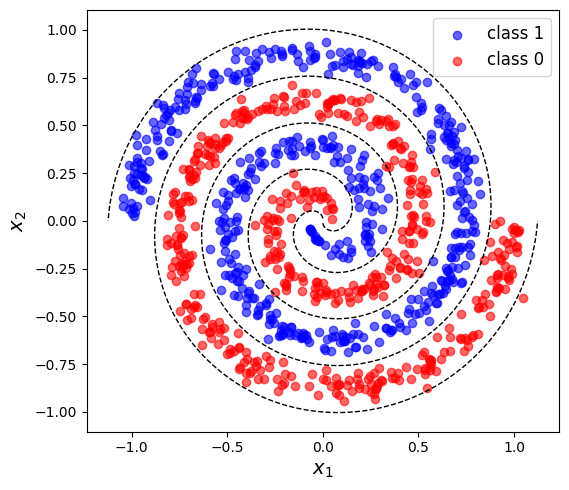

In [ ]:
# basic_datasets.py
# Gerry Angelatos

# Below we define functions to generate data for a pair of basic classification tasks:
# n-dimensional radius (n-spheres) and 2-d spirals

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import sklearn


# spirals dataset

def Spiral_sample2(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    This version '2' adds noise normal to the spiral line (ie radial white noise)
    and normalizes the dataset relative so the noise free set is in [-1, 1]x2
    Parameters
    -----------
    dW
        width of spiral arms (noise strength),
        scales with the number of turns, so strength of 1
        gives about ~90% probability of falling in the correct arm
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle
    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    Norm =  np.array([spiral[0]-spiral[1]/r, spiral[1]-spiral[0]/r]) # normal vector to each point
    return (spiral + (dW * Norm / np.sqrt(Norm[0]**2 + Norm[1]**2))* rs.randn(1, Ns) )/np.max(np.abs(spiral)) # add noise, normalize


def Spiral_line(Ns, ts = 0, Nturns = 3, Sep = 0.05):
    """
    Generates a 2d spiral with N turns
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of equally spaced points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    Returns
    ----------
    np.array
       (2 x Ns) array tracing out a spiral in the x-y plane from the origin

    """
    theta = np.linspace(0, 1, Ns) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral



def Spiral_sample(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle


    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral + rs.randn(2, Ns) * dW

    # Spirals dataset


#parameters of spirals
D_spiral = 2
N_spiral = 1000
cphase = [0, 1] # starting angles, units of pi
Nturns = 4 # number of pi/2 rotations per spiral arm
Sep = 0.05 # separation of arms at origin (small, poistive)
W = 0.5 # relative width of spiral arms due to noise

# generate input set from each class
x_spiral0 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep).T
x_spiral1 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep).T
# concatenate to 1 dataset, with alternating labels
x_spiral = np.dstack((x_spiral1.T, x_spiral0.T)).reshape(D_spiral,  N_spiral).T

# class labels, assign to class 1 if in spiral 1, assign to class 0 if in spiral 0
Y_spiral = np.dstack((np.ones(int(N_spiral/2)),np.zeros(int(N_spiral/2)) )).flatten() # class 1 maps to 1, class 0 to 0


# useful functions for visualization
# define center line of each spiral
spiral_center0 = Spiral_line(int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep)
spiral_center1 = Spiral_line(int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep)
# normalise centers
Spiral_length = np.max([np.max(np.abs(spiral_center0)), np.max(np.abs(spiral_center0))])
spiral_center0, spiral_center1 = spiral_center0/Spiral_length, spiral_center1/ Spiral_length
# separating lines
spiral_mid1 = Spiral_line(int(N_spiral/2), ts = np.mean(cphase)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length
spiral_mid2 = Spiral_line(int(N_spiral/2), ts = (np.mean(cphase)-1)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length

def plot_spirals(x_spiral, Y_spiral):
    fig_spiral, ax_spiral =  plt.subplots(1, 1, figsize=(6,5))

    ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral), 0], x_spiral[np.argwhere(Y_spiral), 1],
                      color = f'b',marker = 'o', alpha = .6, label = 'class 1')
    ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral<0.5), 0], x_spiral[np.argwhere(Y_spiral<0.5), 1],
                      color = f'r',marker = 'o', alpha = .6, label = 'class 0')
    ax_spiral.plot(spiral_mid1[0], spiral_mid1[1], '--k', linewidth=1)
    ax_spiral.plot(spiral_mid2[0], spiral_mid2[1], '--k', linewidth=1)
    ax_spiral.set_xlabel('$x_1$', fontsize=14), ax_spiral.set_ylabel('$x_2$', fontsize=14)
    ax_spiral.legend(fontsize=12)
    ax_spiral.set_aspect('equal', 'box')
    fig_spiral.tight_layout()
plot_spirals(x_spiral, Y_spiral)

In [ ]:
plot_spirals(train_data, train_pred)
plot_spirals(test_data, test_pred)

SVM (where did we copy the code from?)

Estimated running time:0:00:00.416656
C = 1000 ; test_acc = 0.94


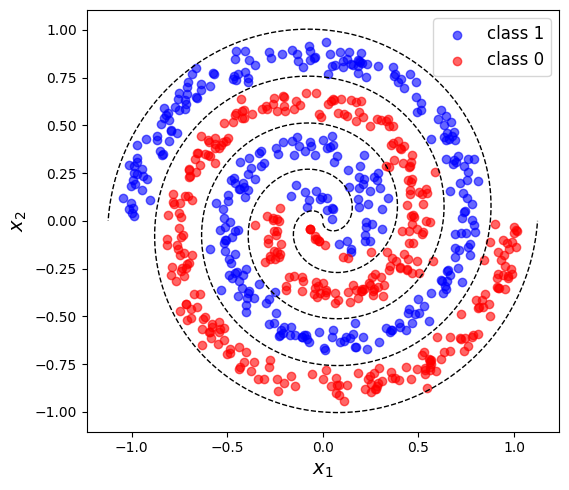

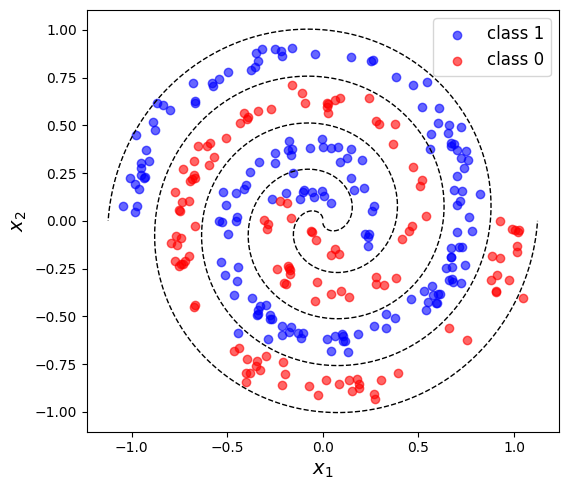

In [ ]:
from sklearn import svm
from time import time
from datetime import timedelta


# is this a good split? should we instead have train data closer to (0, 0) and test farther?
train_idx = np.random.choice(range(len(x_spiral)), size=round(0.7*len(x_spiral)), replace=False)
mask = np.zeros(len(x_spiral), dtype=bool)
mask[train_idx] = True
train_data, test_data = x_spiral[mask], x_spiral[~mask]
train_label, test_label = Y_spiral[mask], Y_spiral[~mask]

C=1000
svm_classifier = svm.SVC(kernel='rbf', C=C)
start = time()
svm_classifier.fit(train_data, train_label)
end = time()
train_acc = svm_classifier.score(train_data, train_label)
test_acc = svm_classifier.score(test_data, test_label)

train_pred, test_pred = svm_classifier.predict(train_data), svm_classifier.predict(test_data)

print('Estimated running time:' + str(timedelta(seconds=end - start)))
print('C =', C, '; test_acc =', test_acc)

plot_spirals(train_data, train_pred)
plot_spirals(test_data, test_pred)


In [ ]:
score_callable_function = svm_classifier.score(test_data, test_label)
print(f"Callable kernel classification test score: {score_callable_function}")

Callable kernel classification test score: 0.94


In [ ]:
#let's try to draw output picture as at the playground. To do this create a grid as input data
#and give it to our model for calculating 'y' (output). Given 'y' we can draw picture of activation

import numpy as np

#special feed dictionry for this - simple grid with some dimension

#resolution for our picture
image_size = 100
#feed model our grid
#returned array shape is (image_size^2, 1)
x = "my_x"
y_ = "my_y"
num_features = 2

def feed_dict_for_plot(x,y_,dimension):
    xs = np.zeros((dimension*dimension, 2))
    ys = np.zeros((dimension*dimension, 1))
    index = 0
    for i in range(dimension):
        for j in range(dimension):
            xs[index][0] = 2*(i / dimension - 0.5)
            xs[index][1] = 2*(j / dimension - 0.5)
            ys[index][0] = 0 #we do not train the model, so we don't define labels
            index += 1
    return {x: xs, y_: ys}

feed_dict = feed_dict_for_plot(x, y_, image_size)
svm_pred = svm_classifier.predict(feed_dict[x]) # data supplied here

[(0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0), (0, 0, 1), (0, 0, 0)

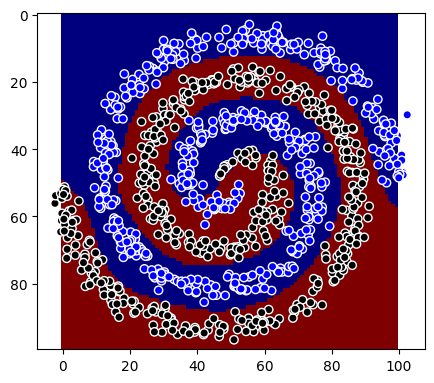

In [ ]:
import matplotlib.cm as cm

def draw_VQC(x_spiral, Y_spiral, pred):

    def out_data_to_rgb(my_y, dimension):
        y_max = np.max(my_y)
        if (y_max == 0):
            y_max = 0.1
        my_data = cm.jet(my_y/y_max)[:,0:3]
        out_picture = np.reshape(my_data, (dimension, dimension, 3))
        out_picture = np.transpose(out_picture,(1,0,2))
        return out_picture


    #let's draw output
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(out_data_to_rgb(pred, image_size))

    #finaly add our dataset at the top of picture as reference
    colors = []
    data_x, data_y = 0.5*x_spiral+0.5, np.array([[y, 0] for y in Y_spiral])
    y_max = np.max(data_x[:,0])
    y_min = np.min(data_y[:,0])
    for i in range(len(data_y[:,0])):
        output = (data_y[i,0] - y_min)/(y_max - y_min)
        colors.append((int(output), 0, int(1-output)))
    print(colors)
    ax.scatter(data_x[:,0]*image_size, data_x[:,1]*image_size, color=colors, edgecolors ='w')
    plt.show()

draw_VQC(x_spiral, Y_spiral, svm_pred)

Feed-forward NN - PyTorch (https://github.com/Belerafon/Spiral-2.0)

In [ ]:
import torch
from torch.autograd import Variable
import numpy as np
from scipy.stats import truncnorm
import random
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
dtype = torch.FloatTensor

epoch_for_train=2000 #How long to train
samples_per_epoch=250 #The playground.tensorflow.org has 250 train points (and 250 for test)
train_batch_size = 20 #10 as at the playground
summary_every_epoch = 100 #print loss
layers_sizes = [8, 8, 8, 8, 8, 1] #network configuration: every value is layer size


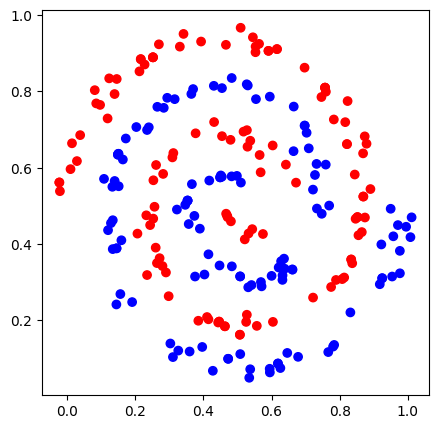

In [ ]:
data_x, data_y = 0.5*x_spiral+0.5, np.array([[y, 0] for y in Y_spiral])

#function to feed dictionary. Returns a random points from generated data as arrays with batch_size len
dict_index=0
def feed_my_dict(x,y_,batch_size):
    global dict_index
    xs = np.zeros((batch_size, 2))
    ys = np.zeros((batch_size, 1))
    for i in range(batch_size):
        dict_index=int(round(random.random()*(len(data_x[:,0])-1)))
        xs[i][0] = data_x[dict_index,0]
        xs[i][1] = data_x[dict_index,1]
        ys[i][0] = data_y[dict_index,0]
    return {x: xs, y_: ys}


#let's draw generated data
fig, ax = plt.subplots(figsize=(5,5))

#For whole epoch
for j in range(int(samples_per_epoch/train_batch_size)):
    my_x="x"
    my_y="y"
    #call function that is used for feed tensorflow (to verify it)
    feed_dict=feed_my_dict(my_x,my_y,train_batch_size)
    colors = []
    #to colorize data find max and min y in data
    y_max=np.max(feed_dict[my_y][:,0])
    y_min=np.min(feed_dict[my_y][:,0])
    if (y_max!=y_min):
        for i in range(len(feed_dict[my_y][:,0])):#for all batch
            output=(feed_dict[my_y][i,0]-y_min)/(y_max-y_min) #create normalised to 0-1 value
            colors.append((int(output),0,int(1-output)))#color: R-part max when data is '1', B-part max when 0. G always 0
        ax.scatter(feed_dict[my_x][:,0], feed_dict[my_x][:,1], color=colors) #plot all batch points
plt.show()

Let's leave it as is. It took me ~10 tries to make it converge. It often just stays at 50% accuracy by drawing all blue background.

tensor(0.2517, dtype=torch.float64)
tensor(0.2372, dtype=torch.float64)
tensor(0.2325, dtype=torch.float64)
tensor(0.2116, dtype=torch.float64)
tensor(0.1817, dtype=torch.float64)
tensor(0.1852, dtype=torch.float64)
tensor(0.2903, dtype=torch.float64)
tensor(0.1712, dtype=torch.float64)
tensor(0.0636, dtype=torch.float64)
tensor(0.0419, dtype=torch.float64)
tensor(0.0713, dtype=torch.float64)
tensor(0.0387, dtype=torch.float64)
tensor(0.0460, dtype=torch.float64)
tensor(0.0298, dtype=torch.float64)
tensor(0.0300, dtype=torch.float64)
tensor(0.0439, dtype=torch.float64)
tensor(0.0300, dtype=torch.float64)
tensor(0.0146, dtype=torch.float64)
tensor(0.0470, dtype=torch.float64)
tensor(0.0225, dtype=torch.float64)
Training time: 23 seconds


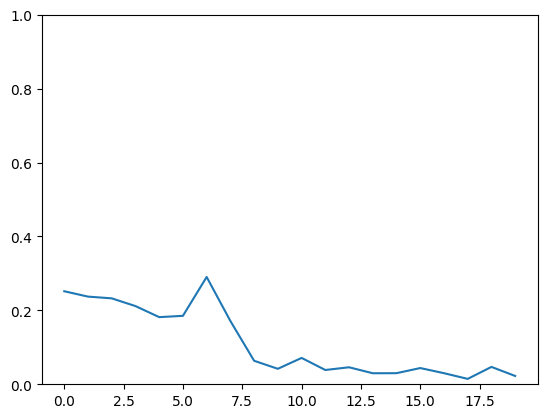

In [ ]:
import time

all_weights = []
all_outputs = []
all_biases = []


#generates random with normal distribution and clipped by -1 and 1
def trunc_norm(shape):
    myclip_a = -1
    myclip_b = 1
    my_mean = 0
    my_std = 0.5
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
    return truncnorm.rvs(a, b, scale = my_std, size=shape)


#init
for n in range(len(layers_sizes)):#creating layers
    if (n==0):#input layer
        weights_shape = (2, layers_sizes[n])
    else:
        weights_shape = (layers_sizes[n-1],layers_sizes[n])
    weights_np=trunc_norm(weights_shape) #numpy random array
    weights=Variable(torch.from_numpy(weights_np), requires_grad=True) #make pytorch variable object from it
    biases = Variable(torch.DoubleTensor(layers_sizes[n]).fill_(0.1), requires_grad=True)
    all_weights.append(weights)
    all_biases.append(biases)
    all_outputs.append(np.zeros(layers_sizes[n]))

#feed forward pass
def nn_forward(batch):
    for n in range(len(layers_sizes)):
        if (n==0):#input layer
            layer_input = Variable(torch.from_numpy(np.array(batch)), requires_grad=False)
        else:
            layer_input= all_outputs[n-1]
        #y=relu(wx+b)
        all_outputs[n]=(layer_input.mm(all_weights[n]) + all_biases[n]).clamp(min=0)
    return all_outputs


#Traning
loss_pic=[]
x = "my_x"
y_ = "my_y"

start = time.time()
for i in range(epoch_for_train):
    if ((i % summary_every_epoch) == 0):#print loss
        feed_dict=feed_my_dict(x,y_,samples_per_epoch)#batch with whole epoch data to calc loss
        my_outputs_pt=nn_forward(feed_dict[x])#feed forward
        y_pred=my_outputs_pt[len(layers_sizes)-1]#output
        #mean square error (MSE)
        loss = (Variable(torch.from_numpy(feed_dict[y_]),requires_grad=False) - y_pred).pow(2).mean()
        loss_np=loss.data
        loss_pic.append(loss_np)
        print(loss_np)

    for j in range(int(samples_per_epoch/train_batch_size)):#one train_step run one batch data
        feed_dict=feed_my_dict(x,y_,train_batch_size) #next batch
        my_outputs_pt=nn_forward(feed_dict[x])#feed forward
        y_pred=my_outputs_pt[len(layers_sizes)-1]#output
        loss = (Variable(torch.from_numpy(feed_dict[y_]),requires_grad=False) - y_pred).pow(2).mean() #MSE

        loss.backward()#pytorch gradients calculator
        for n in range(len(layers_sizes)):#let's train
            leaning_rate=0.05
            all_weights[n].data -= leaning_rate*(all_weights[n].grad.data)
            all_biases[n].data -= leaning_rate*(all_biases[n].grad.data)
            all_weights[n].grad.data.zero_()
            all_biases[n].grad.data.zero_()
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

#let's draw loss
fig, ax = plt.subplots()
ax.plot(loss_pic) #plot all batch points
ax.set_ylim([0,1])
plt.show()

In [ ]:
my_outputs_pt = nn_forward(test_data)

my_outputs = []
for n in range(len(layers_sizes)):
    my_outputs.append(my_outputs_pt[n].data.numpy().T);

output_activation = my_outputs[len(layers_sizes)-1][0]
print(f"Feed-forward NN classification test score: {np.mean([output_activation[i] - test_label[i] <= 0.5 for i in range(len(test_label))])}")

Feed-forward NN classification test score: 0.8766666666666667


[(1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 0)

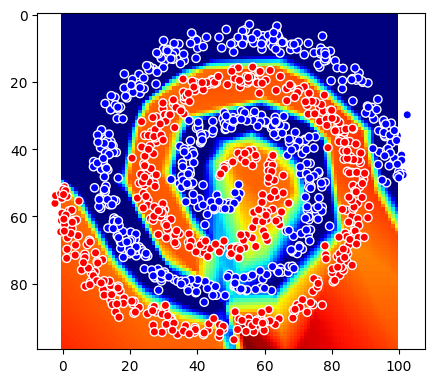

In [ ]:
#let's try to draw output picture as at the playground. To do this create a grid as input data
#and give it to our model for calculating 'y' (output). Given 'y' we can draw picture of activation

#special feed dictionry for this - simple grid with some dimension
def feed_dict_for_plot(x,y_,dimension):
    xs = np.zeros((dimension*dimension, 2))
    ys = np.zeros((dimension*dimension, 1))
    index = 0
    for i in range(dimension):
        for j in range(dimension):
            xs[index][0] = i / dimension
            xs[index][1] = j / dimension
            ys[index][0] = 0 #we do not train the model, so we don't define labels
            index += 1
    return {x: xs, y_: ys}

#resolution for our picture
image_size = 100
#feed model our grid
#returned array shape is (image_size^2, 1)
x = "my_x"
y_ = "my_y"
feed_dict = feed_dict_for_plot(x, y_, image_size)
my_outputs_pt = nn_forward(feed_dict[x])

my_outputs = []
for n in range(len(layers_sizes)):
    my_outputs.append(my_outputs_pt[n].data.numpy().T);

output_activation=my_outputs[len(layers_sizes)-1][0]

#Making rgb picture from output data
def out_data_to_rgb(my_y, dimension):
    y_max = np.max(my_y)
    if (y_max == 0):
        y_max = 0.1
    my_data = cm.jet(my_y/y_max)[:,0:3]
    out_picture = np.reshape(my_data, (dimension, dimension,3))
    out_picture = np.transpose(out_picture,(1,0,2))
    return out_picture


#let's draw output
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(out_data_to_rgb(output_activation, image_size))
#finaly add our dataset at the top of picture as reference
colors = []
y_max = np.max(data_y[:,0])
y_min = np.min(data_y[:,0])
for i in range(len(data_y[:,0])):
    output = (data_y[i,0] - y_min)/(y_max - y_min)
    colors.append((int(output), 0, int(1-output)))
print(colors)
ax.scatter(data_x[:,0]*image_size, data_x[:,1]*image_size, color=colors, edgecolors ='w')
plt.show()